<a href="https://colab.research.google.com/github/vaidande/Cotton-Disease-Prediction-InceptionV3/blob/main/Cotton_Disease_Prediction_Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Lambda, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
from glob import glob

In [4]:
xception = Xception(input_shape=(224, 224, 3), weights='imagenet', include_top=False, pooling = 'avg')

83689472/83683744 [==============================] - 2s 0us/step


In [5]:
xception.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [6]:
#don't train existing weights.
for layer in xception.layers:
  layer.trainable = False

In [7]:
#useful for getting no. of output classes.
folders = glob('/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/train/*')

In [9]:
x = Flatten()(xception.output)
x = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=xception.input, outputs=x)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
#Data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 324 images belonging to 4 classes.


In [18]:
metric = 'val_accuracy'
checkpoint = ModelCheckpoint("/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/cottondisease_xception.h5", monitor = metric, save_best_only=True, mode = 'auto', verbose = 1)

In [21]:
r = model.fit_generator(training_set,
                        validation_data=test_set,
                        epochs=20, callbacks = [checkpoint],
                        steps_per_epoch=len(training_set),
                        validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 1039s 17s/step - loss: 1.1169 - accuracy: 0.5180 - val_loss: 0.5817 - val_accuracy: 0.8210

Epoch 00001: val_accuracy improved from -inf to 0.82099, saving model to /content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/cottondisease_xception.h5
Epoch 2/20
61/61 [==============================] - 48s 792ms/step - loss: 0.5271 - accuracy: 0.8321 - val_loss: 0.4411 - val_accuracy: 0.8426

Epoch 00002: val_accuracy improved from 0.82099 to 0.84259, saving model to /content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/cottondisease_xception.h5
Epoch 3/20
61/61 [==============================] - 48s 786ms/step - loss: 0.4109 - accuracy: 0.8772 - val_loss: 0.3800 - val_accuracy: 0.8765

Epoch 00003: val_accuracy improved from 0.84259 to 0.87654, saving model to /content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/cottondisease_xception.h5
Epoch 4/20
61/61 [==============================] - 49s 805ms/step - loss: 0.3670 - accuracy: 0.8845 - 

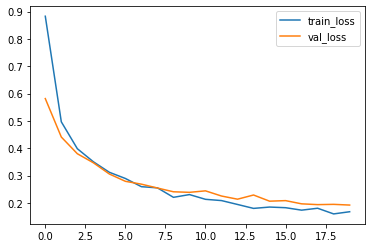

<Figure size 432x288 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig('Loss_ValLoss')

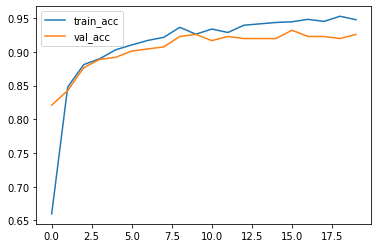

<Figure size 432x288 with 0 Axes>

In [23]:
plt.plot(r.history['accuracy'], label='train_acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig('Acc_ValAcc')

In [24]:
from tensorflow.keras.models import load_model
model.save('/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/cottondisease_xception.h5')

In [28]:
x=image.load_img('/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/test/diseased cotton leaf/dis_leaf (248).jpg',target_size=(224,224))

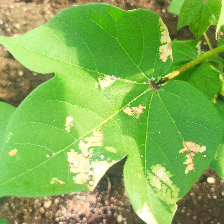

In [29]:
x

In [30]:
test_img = image.img_to_array(x)
test_img = test_img/255
test_img = np.expand_dims(test_img, axis = 0)
result = model.predict(test_img)

In [31]:
a=np.argmax(result, axis=1)

In [32]:
if a==0:
  print("The Leaf is diseased Cotton Leaf")
elif a==1:
  print("The Leaf is diseased Cotton Plant")
elif a==2:
  print("The Leaf is fresh Cotton Leaf")
else:
  print("The Leaf is fresh Cotton Plant")

The Leaf is diseased Cotton Leaf
